## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# **Optimization Attempt #1  = Hyperparameter Tuning**

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_hyper_df = application_df.drop(columns=['EIN', 'NAME'])

In [ ]:
application_hyper_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
print(application_hyper_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [ ]:
app_type_count = application_hyper_df['APPLICATION_TYPE'].value_counts()
print(app_type_count)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
collapse_app_types_below = 525
application_types_to_replace = app_type_count[app_type_count < collapse_app_types_below].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_hyper_df['APPLICATION_TYPE'] = application_hyper_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_hyper_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_hyper_df['CLASSIFICATION'].value_counts()
print(classification_count)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
collapse_classification_below = 1500
classifications_to_replace = classification_count[classification_count < collapse_classification_below].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_hyper_df['CLASSIFICATION'] = application_hyper_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_hyper_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [ ]:
print(application_hyper_df.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_hyper_prepared_df = pd.get_dummies(application_hyper_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'USE_CASE'])
application_hyper_prepared_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,1,108590,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,1,6692,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_hyper_prepared_df["IS_SUCCESSFUL"]
X = application_hyper_prepared_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(25724, 43)

In [ ]:
print(X_train.dtypes)

STATUS                          int64
ASK_AMT                         int64
APPLICATION_TYPE_Other           bool
APPLICATION_TYPE_T10             bool
APPLICATION_TYPE_T19             bool
APPLICATION_TYPE_T3              bool
APPLICATION_TYPE_T4              bool
APPLICATION_TYPE_T5              bool
APPLICATION_TYPE_T6              bool
APPLICATION_TYPE_T7              bool
APPLICATION_TYPE_T8              bool
AFFILIATION_CompanySponsored     bool
AFFILIATION_Family/Parent        bool
AFFILIATION_Independent          bool
AFFILIATION_National             bool
AFFILIATION_Other                bool
AFFILIATION_Regional             bool
CLASSIFICATION_C1000             bool
CLASSIFICATION_C1200             bool
CLASSIFICATION_C2000             bool
CLASSIFICATION_C2100             bool
CLASSIFICATION_C3000             bool
CLASSIFICATION_Other             bool
ORGANIZATION_Association         bool
ORGANIZATION_Co-operative        bool
ORGANIZATION_Corporation         bool
ORGANIZATION

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=75, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation="sigmoid"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,321 (67.66 KB)

 Trainable params: 17,321 (67.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6412 - loss: 0.6442
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7298 - loss: 0.5696
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7293 - loss: 0.5588
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7287 - loss: 0.5559
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7313 - loss: 0.5527
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7267 - loss: 0.5574
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7306 - loss: 0.5530
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7306 - loss: 0.5520
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5471
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7359 - loss: 0.5452
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7334 - loss: 0.5486
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - 8ms/step - accuracy: 0.7331 - loss: 0.5507
Loss: 0.5507164597511292, Accuracy: 0.7330612540245056


## **Accuracy: 0.733**

# **Optimization Attempt #2  = Search Outliers & Binning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print(application_hyper_df.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
application_counts = application_hyper_df['APPLICATION_TYPE'].value_counts()

# Print the result
print(application_counts)

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
affilitation_counts = application_hyper_df['AFFILIATION'].value_counts()

# Print the result
print(affilitation_counts)

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
classification_counts = application_hyper_df['CLASSIFICATION'].value_counts()

# Print the result
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
usecase_counts = application_hyper_df['USE_CASE'].value_counts()

# Print the result
print(usecase_counts)

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
organization_counts = application_hyper_df['ORGANIZATION'].value_counts()

# Print the result
print(organization_counts)


ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
status_counts = application_hyper_df['STATUS'].value_counts()

# Print the result
print(status_counts)


STATUS
1    34294
0        5
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
income_counts = application_hyper_df['INCOME_AMT'].value_counts()

# Print the result
print(income_counts)

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
special_consideration_counts = application_hyper_df['SPECIAL_CONSIDERATIONS'].value_counts()

# Print the result
print(special_consideration_counts )

SPECIAL_CONSIDERATIONS
N    34272
Y       27
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
issuccesful_counts = application_hyper_df['IS_SUCCESSFUL'].value_counts()

# Print the result
print(issuccesful_counts)

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64


In [ ]:
# Display the unique values and their counts in the 'USE_CASE' column
ask_counts = application_hyper_df['ASK_AMT'].value_counts()

# Print the result
print(ask_counts)

ASK_AMT
5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64


## Review ASK_AMT for outliers and binning

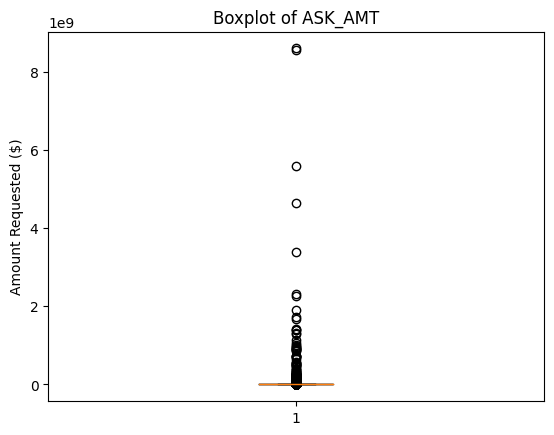

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# Extract the ASK_AMT column data from your DataFrame
ask_amt = application_hyper_df['ASK_AMT']

# Create a boxplot to visualize outliers in the ASK_AMT column
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of ASK_AMT')
ax1.set_ylabel('Amount Requested ($)')
ax1.boxplot(ask_amt)
plt.show()

In [ ]:
# Create a copy of the original DataFrame
application_hyper_bin_df = application_hyper_df.copy()

# Add a small constant to avoid taking log of zero and perform the logarithmic transformation
application_hyper_bin_df['Log_ASK_AMT'] = np.log1p(application_hyper_df['ASK_AMT'])

# Create bins based on the log-transformed values
log_bins = pd.cut(application_hyper_bin_df['Log_ASK_AMT'], bins=10)

# Map the log bins to custom labels
custom_labels = {
    "(8.503, 9.953]": "$3K - $20K",
    "(9.953, 11.389]": "$20K - $90K",
    "(11.389, 12.825]": "$90K - $370K",
    "(12.825, 14.26]": "$370K - $1.4M",
    "(14.26, 15.696]": "$1.4M - $5.5M",
    "(15.696, 17.132]": "$5.5M - $24M",
    "(17.132, 18.568]": "$24M - $90M",
    "(18.568, 20.003]": "$90M - $490M",
    "(20.003, 21.439]": "$490M - $1.5B",
    "(21.439, 22.875]": "$1.5B+"
}

# Assign the custom labels
application_hyper_bin_df['Log_ASK_AMT_Binned_Clean'] = log_bins.map(str).map(custom_labels)

# Check the distribution of the custom-labeled bins
print(application_hyper_bin_df['Log_ASK_AMT_Binned_Clean'].value_counts())


Log_ASK_AMT_Binned_Clean
$3K - $20K       26814
$20K - $90K       2711
$90K - $370K      2208
$370K - $1.4M     1310
$1.4M - $5.5M      737
$5.5M - $24M       280
$24M - $90M        143
$90M - $490M        56
$490M - $1.5B       33
$1.5B+               7
Name: count, dtype: int64


In [ ]:
print(application_hyper_bin_df.columns)


Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL', 'Log_ASK_AMT', 'Log_ASK_AMT_Binned_Clean'],
      dtype='object')


In [ ]:
# Drop the columns 'ASK_AMT' and 'Log_ASK_AMT'
application_hyper_bin_df = application_hyper_bin_df.drop(columns=['ASK_AMT', 'Log_ASK_AMT'])

# Rename the column 'Log_ASK_AMT_Binned_Clean' to 'ASK_AMT_BIN'
application_hyper_bin_df = application_hyper_bin_df.rename(columns={'Log_ASK_AMT_Binned_Clean': 'ASK_AMT_BIN'})

# Display the first few rows to verify the changes
print(application_hyper_bin_df.head())

  APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  \
0   Association       1              0                      N              1   
1  Co-operative       1         1-9999                      N              1   
2   Association       1              0                      N              0   
3         Trust       1    10000-24999                      N              1   
4         Trust       1  100000-499999                      N              1   

    ASK_AMT_BIN  
0    $3K - $20K  
1  $90K - $370K  
2    $3K - $20K  
3    $3K - $20K  
4  $90K - $370

In [ ]:
print(application_hyper_bin_df.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'ASK_AMT_BIN'],
      dtype='object')


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_hyper_bin_prepared_df = pd.get_dummies(application_hyper_bin_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT_BIN'])
application_hyper_prepared_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,1,108590,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,1,6692,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
print(application_hyper_prepared_df.columns)

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'SPECIAL_CONSIDERATIONS_N',
       'SPECIAL_C

In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_hyper_bin_prepared_df["IS_SUCCESSFUL"]
X = application_hyper_bin_prepared_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(25724, 53)

In [ ]:
print(X_train.dtypes)

APPLICATION_TYPE_Other          bool
APPLICATION_TYPE_T10            bool
APPLICATION_TYPE_T19            bool
APPLICATION_TYPE_T3             bool
APPLICATION_TYPE_T4             bool
APPLICATION_TYPE_T5             bool
APPLICATION_TYPE_T6             bool
APPLICATION_TYPE_T7             bool
APPLICATION_TYPE_T8             bool
AFFILIATION_CompanySponsored    bool
AFFILIATION_Family/Parent       bool
AFFILIATION_Independent         bool
AFFILIATION_National            bool
AFFILIATION_Other               bool
AFFILIATION_Regional            bool
CLASSIFICATION_C1000            bool
CLASSIFICATION_C1200            bool
CLASSIFICATION_C2000            bool
CLASSIFICATION_C2100            bool
CLASSIFICATION_C3000            bool
CLASSIFICATION_Other            bool
USE_CASE_CommunityServ          bool
USE_CASE_Heathcare              bool
USE_CASE_Other                  bool
USE_CASE_Preservation           bool
USE_CASE_ProductDev             bool
ORGANIZATION_Association        bool
O

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=75, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation="sigmoid"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │           5,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,321 (71.57 KB)

 Trainable params: 18,321 (71.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6444 - loss: 0.6303
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7290 - loss: 0.5708
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7344 - loss: 0.5573
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7338 - loss: 0.5516
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7351 - loss: 0.5502
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7322 - loss: 0.5534
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5493
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7342 - loss: 0.5506
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7342 - loss: 0.5477
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7406 - loss: 0.5400
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5448
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7223 - loss: 0.5575
Loss: 0.5574935674667358, Accuracy: 0.7223323583602905


## **Accuracy: 0.722**

# **Optimization Attempt #3  = Identify Weak and Strong Features**

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [ ]:
!pip uninstall -y scikeras
!pip install scikeras


Found existing installation: scikeras 0.13.0
Uninstalling scikeras-0.13.0:
  Successfully uninstalled scikeras-0.13.0
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Ensure that nn is defined as your Keras model
# wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test_scaled.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")




Weakest feature: INCOME_AMT_0 with importance -0.0006647230320700026
Weakest feature: INCOME_AMT_25000-99999 with importance -0.0006064139941691193
Weakest feature: ASK_AMT_BIN_$3K - $20K with importance -0.00045481049562685617
Weakest feature: ORGANIZATION_Co-operative with importance -0.00025655976676385305
Weakest feature: INCOME_AMT_5M-10M with importance -0.0001516034985422965
Weakest feature: ASK_AMT_BIN_$1.5B+ with importance -0.0001282798833819432
Weakest feature: USE_CASE_Heathcare with importance -3.3306690738754695e-17
Weakest feature: USE_CASE_Other with importance 0.0
Weakest feature: STATUS_0 with importance 1.1661807580176654e-05
Weakest feature: STATUS_1 with importance 1.1661807580176654e-05
Weakest feature: AFFILIATION_Other with importance 2.3323615160353307e-05
Weakest feature: INCOME_AMT_100000-499999 with importance 5.830903790084996e-05
Weakest feature: SPECIAL_CONSIDERATIONS_Y with importance 9.329446064139102e-05
Weakest feature: APPLICATION_TYPE_T7 with import

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Wrap your Keras model
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")


Strongest feature: AFFILIATION_CompanySponsored with importance 0.05385422740524776
Strongest feature: AFFILIATION_Independent with importance 0.051720116618075754
Strongest feature: APPLICATION_TYPE_T4 with importance 0.021807580174927076
Strongest feature: APPLICATION_TYPE_T10 with importance 0.010775510204081563
Strongest feature: CLASSIFICATION_Other with importance 0.008979591836734625
Strongest feature: APPLICATION_TYPE_T5 with importance 0.008804664723032008
Strongest feature: APPLICATION_TYPE_T6 with importance 0.007591836734693824
Strongest feature: ORGANIZATION_Association with importance 0.004664723032069928
Strongest feature: ORGANIZATION_Trust with importance 0.004641399416909564
Strongest feature: CLASSIFICATION_C3000 with importance 0.0039883381924197825
Strongest feature: CLASSIFICATION_C2100 with importance 0.0036034985422739862
Strongest feature: CLASSIFICATION_C2000 with importance 0.003486880466472231
Strongest feature: INCOME_AMT_1-9999 with importance 0.0030087463

In [ ]:
# Make copy of clean application_hyper_bin_df
application_feature_df = application_hyper_bin_df.copy()
print(application_feature_df.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'ASK_AMT_BIN'],
      dtype='object')


In [ ]:
# Drop weak features (Use_Case, ASK_AMT_BIN), and keep strong features(Affiliation, Application, Classification, Organization)
application_feature_strong_df = application_feature_df.drop(columns=['USE_CASE','ASK_AMT_BIN', 'INCOME_AMT'])
print(application_feature_strong_df.columns)



Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION',
       'STATUS', 'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL'],
      dtype='object')


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_feature_prepared_df = pd.get_dummies(application_feature_strong_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION','ORGANIZATION', 'STATUS','SPECIAL_CONSIDERATIONS'])
application_feature_prepared_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_C3000,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,STATUS_0,STATUS_1,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,0,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,True,False
3,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False


In [ ]:
print(application_feature_prepared_df.columns)

Index(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'STATUS_0',
       'STATUS_1', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')


In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_feature_prepared_df["IS_SUCCESSFUL"]
X = application_feature_prepared_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(25724, 29)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=75, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation="sigmoid"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,921 (62.19 KB)

 Trainable params: 15,921 (62.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6294 - loss: 0.6497
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7251 - loss: 0.5762
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7227 - loss: 0.5716
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7246 - loss: 0.5687
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7256 - loss: 0.5646
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7248 - loss: 0.5664
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7225 - loss: 0.5663
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7278 - loss: 0.5639
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7289 - loss: 0.5597
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7297 - loss: 0.5622
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7257 - loss: 0.5660
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7263 - loss: 0.5609
Loss: 0.5609097480773926, Accuracy: 0.7262973785400391


## **Accuracy: 0.726**

# **Optimization Attempt #4  = Auto Optimization**

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import keras_tuner as kt
import tensorflow as tf
from sklearn.datasets import make_moons

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=8,
        max_value=128,
        step=8), activation=activation, input_dim=n_features))

    # Allow kerastuner to decide the number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=8,
            max_value=128,
            step=8),
            activation=activation))

        # Optionally add dropout for regularization
        if hp.Choice('add_dropout_' + str(i), [True, False]):
            nn_model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                                               min_value=0.0,
                                                               max_value=0.5,
                                                               step=0.1)))

    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    nn_model.compile(loss="binary_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])

    return nn_model

In [ ]:
# Import the kerastuner library
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 00m 52s]
val_accuracy: 0.7272303104400635

Best val_accuracy So Far: 0.7285131216049194
Total elapsed time: 00h 23m 51s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 7,
 'num_layers': 4,
 'units_0': 3,
 'units_1': 9,
 'units_2': 3,
 'units_3': 7,
 'units_4': 5,
 'units_5': 1,
 'add_dropout_0': 0,
 'dropout_0': 0.30000000000000004,
 'optimizer': 'adam',
 'add_dropout_1': 1,
 'dropout_1': 0.1,
 'add_dropout_2': 0,
 'dropout_2': 0.0,
 'add_dropout_3': 1,
 'dropout_3': 0.0,
 'add_dropout_4': 0,
 'dropout_4': 0.30000000000000004,
 'add_dropout_5': 0,
 'dropout_5': 0.0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0015'}

In [ ]:
best_hyper.values = {
    'activation': 'sigmoid',
    'first_units': 7,
    'num_layers': 4,
    'units_0': 3,
    'units_1': 9,
    'units_2': 3,
    'units_3': 7,
    'units_4': 5,
    'units_5': 1,
    'add_dropout_0': 0,
    'dropout_0': 0.30000000000000004,
    'optimizer': 'adam',
    'add_dropout_1': 1,
    'dropout_1': 0.1,
    'add_dropout_2': 0,
    'dropout_2': 0.0,
    'add_dropout_3': 1,
    'dropout_3': 0.0,
    'add_dropout_4': 0,
    'dropout_4': 0.30000000000000004,
    'add_dropout_5': 0,
    'dropout_5': 0.0,
    'tuner/epochs': 20,
    'tuner/initial_epoch': 7,
    'tuner/bracket': 1,
    'tuner/round': 1,
    'tuner/trial_id': '0015'
}


In [ ]:
# Define the model - deep neural net
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=best_hyper['first_units'], activation=best_hyper['activation'], input_dim=n_features))

# Add additional hidden layers based on num_layers
for i in range(best_hyper['num_layers']):
    nn.add(tf.keras.layers.Dense(units=best_hyper[f'units_{i}'], activation=best_hyper['activation']))

    # Add dropout if specified
    if best_hyper[f'add_dropout_{i}']:
        nn.add(tf.keras.layers.Dropout(rate=best_hyper[f'dropout_{i}']))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer=best_hyper['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 7)                   │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336 (1.31 KB)

 Trainable params: 336 (1.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=20, callbacks=[checkpoint_callback])


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7108 - loss: 0.6452
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7192 - loss: 0.5931
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7265 - loss: 0.5851
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7216 - loss: 0.5885
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7273 - loss: 0.5836
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5807
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7238 - loss: 0.5865
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7251 - loss: 0.5844
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7184 - loss: 0.5919
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7223 - loss: 0.5882
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7250 - loss: 0.5861
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7221 - loss: 0.5586
Loss: 0.5586107969284058, Accuracy: 0.7220991253852844


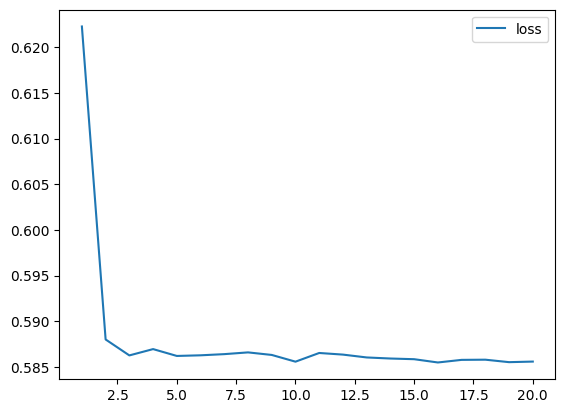

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

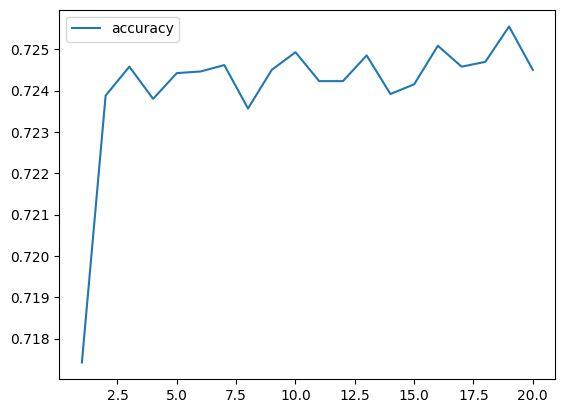

In [ ]:
history_df.plot(y="accuracy")
plt.show()

## **Accuracy: .722**

In [ ]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

In [ ]:
from google.colab import files

# Download the file to your local computer
files.download("AlphabetSoupCharity_Optimization.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>